In [2]:
import numpy as np 
import pandas as pd 
import os
import random
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Dense,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

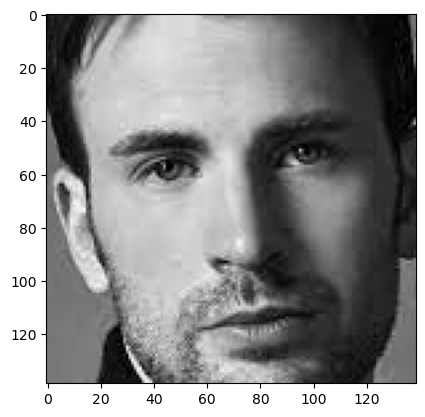

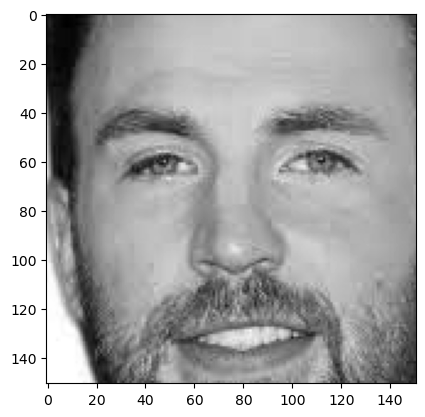

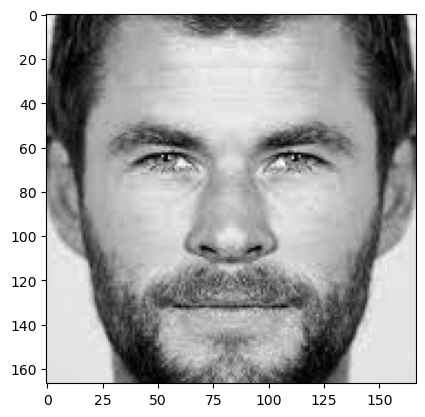

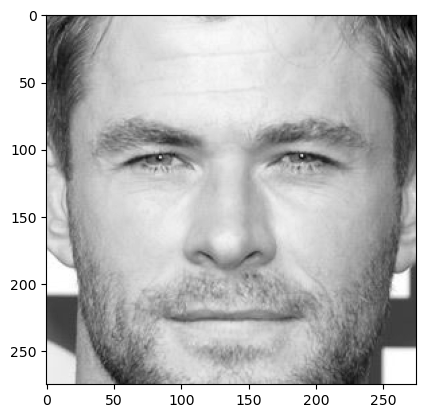

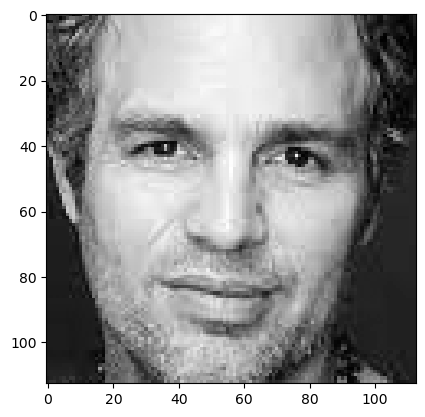

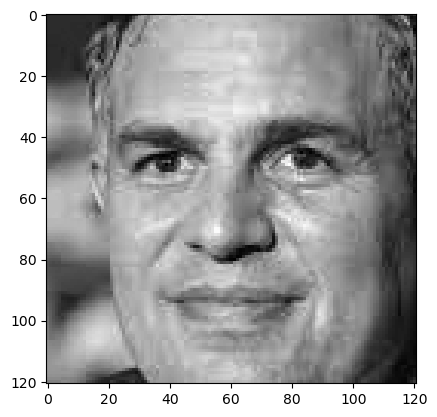

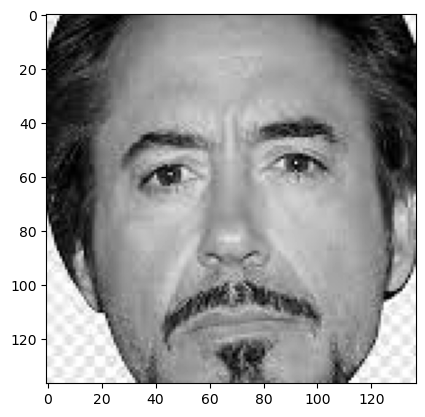

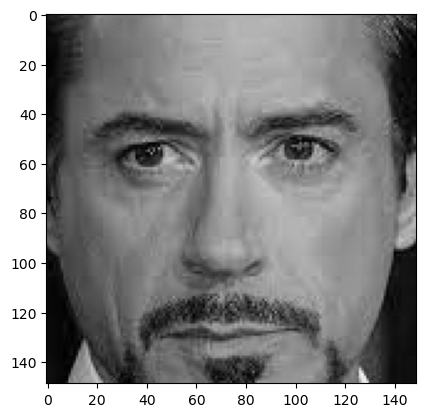

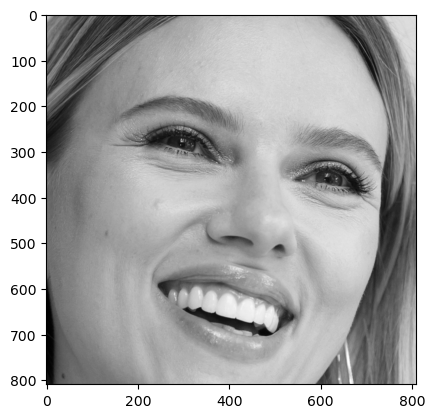

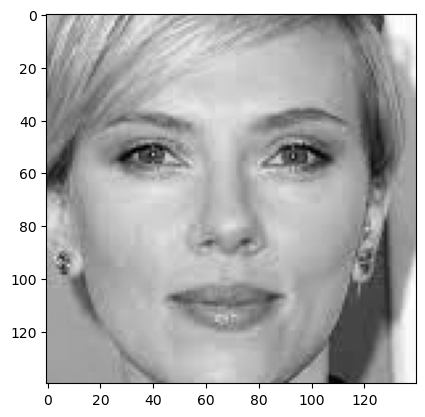

In [3]:
DATADIR = 'cropped_images'
CATEGORIES = ["chris_evans","chris_hemsworth","mark_ruffalo","robert_downey_jr","scarlett_johansson"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if x==2 :
            break

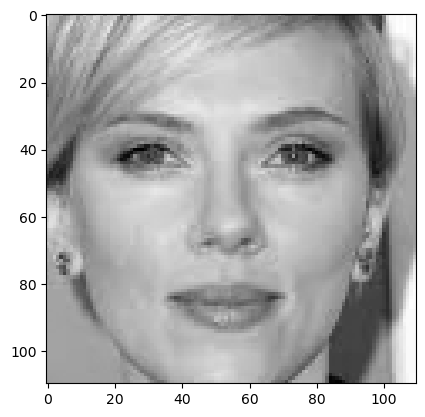

In [4]:
IMG_SIZE = 110
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
         for img in (os.listdir(path)):
                try:
                    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                    training_data.append([new_array, class_num])
                except Exception as e:
                    pass
create_training_data()

In [6]:
print(training_data[0])

[array([[ 27,  23,  26, ...,  30, 103, 110],
       [ 18,  31,  26, ...,  25,  89, 112],
       [ 19,  27,  23, ...,  19,  86, 108],
       ...,
       [113, 113, 112, ..., 109, 108, 108],
       [113, 113, 114, ..., 109, 109, 108],
       [114, 114, 115, ..., 109, 109, 108]], dtype=uint8), 0]


In [7]:
import random 
random.shuffle(training_data)
for i in training_data[:6]:
    print(i[1])

2
3
2
0
3
0


In [8]:
x = []
y = []
for feature,label in training_data:
    x.append(feature)
    y.append(label)    
    
x = np.array(x).reshape(-1, IMG_SIZE,IMG_SIZE)/255.0
y = np.array(y)

In [9]:
print(x.shape)

(274, 110, 110)


In [10]:
print(x)

[[[0.18039216 0.05098039 0.12156863 ... 0.0627451  0.2        0.21176471]
  [0.32156863 0.01960784 0.12156863 ... 0.04705882 0.16078431 0.31372549]
  [0.27058824 0.01176471 0.0745098  ... 0.05098039 0.10196078 0.35686275]
  ...
  [0.06666667 0.01960784 0.03137255 ... 0.56862745 0.45098039 0.50196078]
  [0.10588235 0.05882353 0.05490196 ... 0.52156863 0.45098039 0.54509804]
  [0.14901961 0.10980392 0.07843137 ... 0.45098039 0.42352941 0.62352941]]

 [[0.92941176 0.93333333 0.91372549 ... 0.11372549 0.11372549 0.11372549]
  [0.92941176 0.92941176 0.91764706 ... 0.10980392 0.10980392 0.10980392]
  [0.92941176 0.9254902  0.91764706 ... 0.10588235 0.10588235 0.10588235]
  ...
  [0.90980392 0.90588235 0.90588235 ... 0.09019608 0.12156863 0.09411765]
  [0.8745098  0.88235294 0.89411765 ... 0.0745098  0.09019608 0.08235294]
  [0.85882353 0.86666667 0.88235294 ... 0.11764706 0.10196078 0.09019608]]

 [[0.09803922 0.12941176 0.16470588 ... 0.16078431 0.16078431 0.16470588]
  [0.07843137 0.176470

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(219, 110, 110)
(55, 110, 110)
(219,)
(55,)


## MAKE THE MODEL

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))
model.add(Dense(256 , activation ='relu'))
model.add(BatchNormalization())
model.add(Dense(128 , activation ='relu'))
model.add(BatchNormalization())
model.add(Dense(64 , activation ='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12100)             0         
                                                                 
 dense (Dense)               (None, 256)               3097856   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)               

In [13]:
model.compile(optimizer=Adam(learning_rate=0.002),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_history = model.fit(x_train,y_train, epochs=20,validation_data=(x_test,y_test))

Epoch 1/20


7/7 [==============================] - 4s 123ms/step - loss: 1.7301 - accuracy: 0.3151 - val_loss: 10.0109 - val_accuracy: 0.1818
Epoch 2/20
7/7 [==============================] - 0s 49ms/step - loss: 1.0577 - accuracy: 0.5571 - val_loss: 6.9041 - val_accuracy: 0.2182
Epoch 3/20
7/7 [==============================] - 0s 48ms/step - loss: 0.7458 - accuracy: 0.7671 - val_loss: 6.2846 - val_accuracy: 0.1818
Epoch 4/20
7/7 [==============================] - 0s 45ms/step - loss: 0.5953 - accuracy: 0.8128 - val_loss: 4.3153 - val_accuracy: 0.2909
Epoch 5/20
7/7 [==============================] - 0s 46ms/step - loss: 0.4277 - accuracy: 0.8584 - val_loss: 3.9879 - val_accuracy: 0.2909
Epoch 6/20
7/7 [==============================] - 0s 47ms/step - loss: 0.3400 - accuracy: 0.9087 - val_loss: 2.4788 - val_accuracy: 0.4545
Epoch 7/20
7/7 [==============================] - 0s 44ms/step - loss: 0.2413 - accuracy: 0.9452 - val_loss: 2.0515 - val_accuracy: 0.3636
Epoch 8/20
7/7 [=======

Text(0, 0.5, 'Loss')

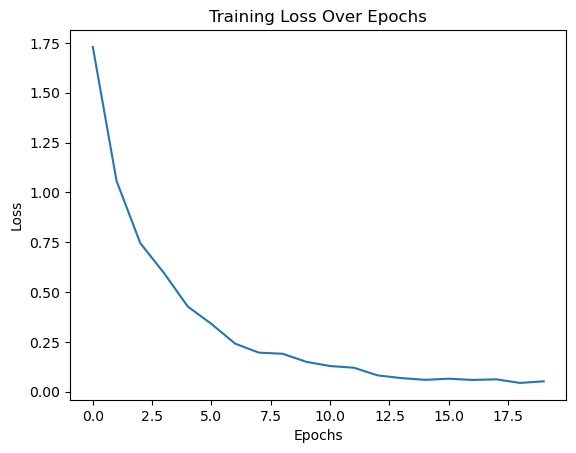

In [15]:
history = model_history  # Replace this with your actual history object
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

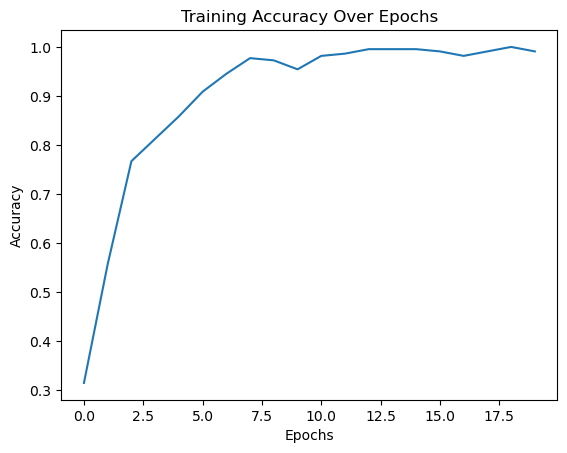

In [16]:
history = model_history  # Replace this with your actual history object
# Plot training loss
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

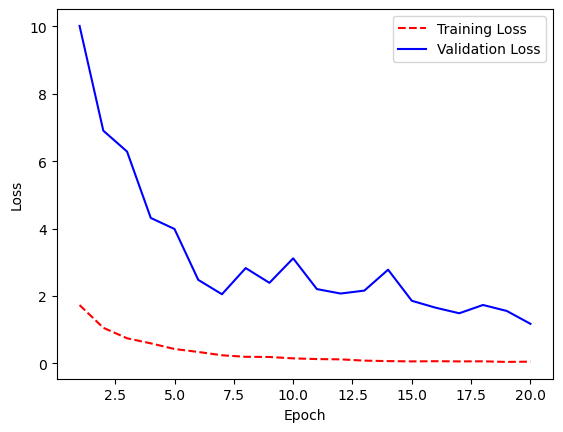

In [17]:
# Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

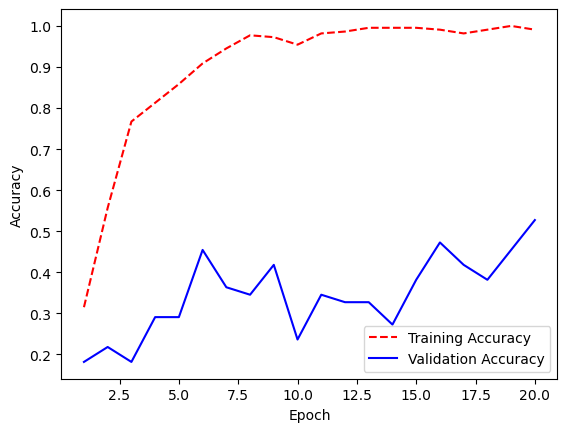

In [18]:
# Get training and test loss histories
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

## GET ACCURACY OF THE TEST_DATA

In [19]:
test_loss, test_acc = model.evaluate(x_test,y_test)
test_acc

2/2 [==============================] - 0s 8ms/step - loss: 1.1738 - accuracy: 0.5273


0.5272727012634277

## Confusion Matrix

2/2 [==============================] - 0s 5ms/step
Confusion Matrix:
[[ 0  9  0  0  0]
 [ 0 13  2  0  0]
 [ 2  4  2  2  0]
 [ 1  5  0  5  0]
 [ 0  1  0  0  9]]


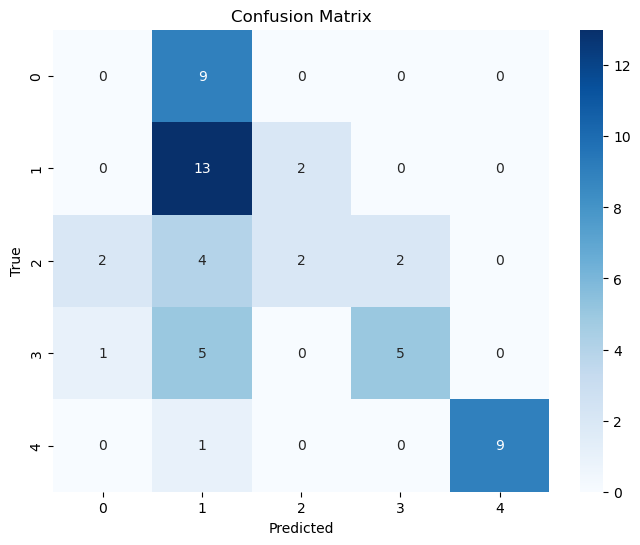

In [86]:
from sklearn.metrics import confusion_matrix

# Get predictions
predictions = np.argmax(model.predict(x_test), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix with colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# N-Fold Cross Validation

In [104]:
from sklearn.model_selection import StratifiedKFold
# Define the number of folds for cross-validation
n_splits = 5

# Initialize KFold cross-validator
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(x_test, y_test):
    X_train, X_val = x_test[train_index], x_test[test_index]
    y_train, y_val = y_test[train_index], y_test[test_index]
    
    # Create and train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model on the validation set
    y_pred = np.argmax(model.predict(X_val), axis=1)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Calculate mean accuracy and standard deviation
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Fold': np.arange(1, n_splits + 1),
    'Accuracy': accuracy_scores
})
# Function to apply color based on condition
def color_high(val):
    color = 'green' if val > 0.6 else ('yellow' if val > 0.4 else 'red')
    return f'background-color: {color}'

# Apply the color to the Accuracy column
styled_df = results_df.style.applymap(color_high, subset=['Accuracy'])

# Display the styled DataFrame
display(styled_df)
# # Display the table
# print(styled_df)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_accuracy:.4f}")

1/1 [==============================] - 0s 31ms/step


,Fold,Accuracy
0,1,0.818182
1,2,0.545455
2,3,0.363636
3,4,0.454545
4,5,0.636364



Mean Accuracy: 0.5636
Standard Deviation: 0.1564


In [87]:
indexes = []
for label in set(y_test):
        indexes.append(np.where(y_test == label)[0])
   
print(len(indexes))
id  = []
for i in indexes:
    id.append(i.flat[0])

class_wise_test_img = x_test[id]
class_wise_test_labels = y_test[id]
print(class_wise_test_img.shape)

5
(5, 110, 110)


In [88]:
# Class wise image test
model.evaluate(class_wise_test_img,class_wise_test_labels)

1/1 [==============================] - 0s 31ms/step - loss: 0.4850 - accuracy: 0.8000


[0.48504146933555603, 0.800000011920929]

1/1 [==============================] - 0s 31ms/step


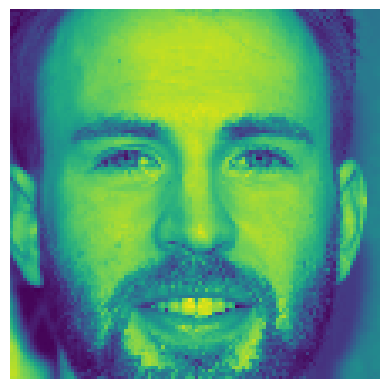

PREDICTION : The Face is belongs to : chris_hemsworth
ACTUAL : The Image belongs to class : chris_evans
1/1 [==============================] - 0s 24ms/step


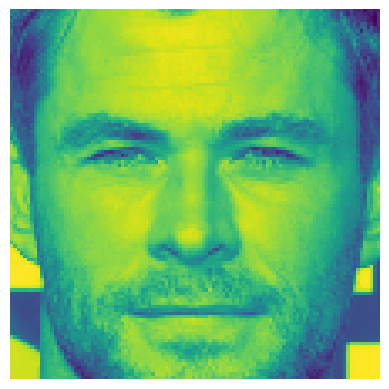

PREDICTION : The Face is belongs to : chris_hemsworth
ACTUAL : The Image belongs to class : chris_hemsworth
1/1 [==============================] - 0s 20ms/step


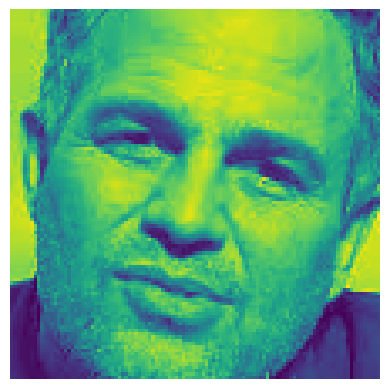

PREDICTION : The Face is belongs to : mark_ruffalo
ACTUAL : The Image belongs to class : mark_ruffalo
1/1 [==============================] - 0s 24ms/step


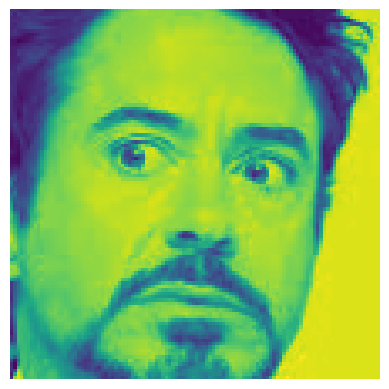

PREDICTION : The Face is belongs to : robert_downey_jr
ACTUAL : The Image belongs to class : robert_downey_jr
1/1 [==============================] - 0s 26ms/step


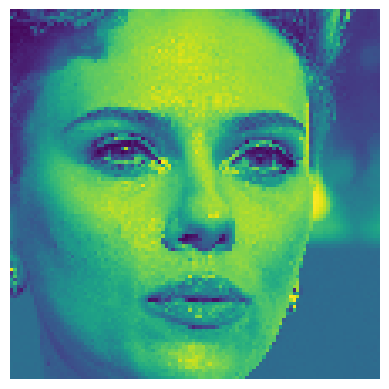

PREDICTION : The Face is belongs to : scarlett_johansson
ACTUAL : The Image belongs to class : scarlett_johansson


In [89]:
for i,img in enumerate(class_wise_test_img):
     img_arr = np.expand_dims(img,axis=0) # to add new dimension to meet required input dims
     classes = model.predict(img_arr)
     plt.imshow(img)
     plt.axis('off')
     plt.show()
     predicted_class = np.argmax(classes)
     print('PREDICTION : The Face is belongs to : {}'.format(CATEGORIES[predicted_class]))
     print('ACTUAL : The Image belongs to class : {}'.format(CATEGORIES[class_wise_test_labels[i]]))

## Test Using GUI

In [85]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
from tkinter import *

win = tk.Tk()
win.geometry("800x700")

win['background'] = '#110e1b'

font = ('black', 10, 'bold')
Imagetext2 = Label(win, text='PREDICTION Name of the Face')
Imagetext2.config(bg='#68b0ab', fg='white')
Imagetext2.config(font=font)
Imagetext2.config(height=3, width=30)
Imagetext2.place(x=300, y=7)

font1 = ('times',15, 'bold')
predict = Text(win, height=3, width=40)
predict.place(x=220, y=80)
predict.config(font=font1)


frame = Frame(win, width=300, height=300, bg="#faf3dd", colormap="new")
frame.pack()
frame.place(x=250, y=170)

from PIL import Image
import matplotlib.image as mpimg

def get_probabilities(image):
        img_array = image.convert('L')
        img_array = cv2.resize(np.array(img_array), (IMG_SIZE, IMG_SIZE))
        image =np.array(img_array).reshape(-1, IMG_SIZE,IMG_SIZE)/255.0
        img_arr = np.expand_dims(image,axis=0) # to add new dimension to meet required input dims
        classes = model.predict(img_arr)
        predicted_class = np.argmax(classes)
        name = format(CATEGORIES[predicted_class]).upper()
        print(name)
        predict.delete('1.0',END)
        predict.insert(END, (name))

def upload_file():
    global img
    for widget in frame.winfo_children():
        widget.destroy()
    f_types = [('PNG Files', '*.png')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img=Image.open(filename)
    get_probabilities(img)
    img_resized=img.resize((300,300)) 
    img=ImageTk.PhotoImage(img_resized)
    label = Label(frame, image = img)
    label.pack()

def close():
   win.destroy()

b1 = tk.Button(win,text='Upload \nPhoto', width=20,command = lambda:upload_file())
b1.config(font=('times', 12, 'bold'))
b1.place(x=300, y=600)

exitButton = Button(win, text="Exit", command=close)
exitButton.place(x=560, y=600)
exitButton.config(font=('times', 12, 'bold'))

win.mainloop()  

1/1 [==============================] - 0s 31ms/step
ROBERT_DOWNEY_JR


# Test Using Camira

In [632]:
# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def face_extractor(img):
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if len(faces) == 0:
        return None
    
    # Crop all faces found
    x, y, w, h = faces[0]
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    cropped_face = img[y:y+h, x:x+w]
    return cropped_face


cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        img_array = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    # Resize the image to the desired dimensions (IMG_SIZE x IMG_SIZE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_arr = np.expand_dims(new_array,axis=0) # to add new dimension to meet required input dims
        classes = model.predict(img_arr)
        predicted_class = np.argmax(classes)
        print(format(CATEGORIES[predicted_class]).upper())
        cv2.putText(frame,format(CATEGORIES[predicted_class]).upper(), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()



1/1 [==============================] - 0s 80ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 22ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 23ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 35ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 24ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 21ms/step
SCARLETT_JOHANSSON
1/1 [=

1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 20ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 10ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 27ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 20ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 24ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 23ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 22ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 22ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 22ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 19ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 28ms/step
SCARLETT_JOHANSSON
1/1 [=

1/1 [==============================] - 0s 17ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 19ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 31ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 31ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 18ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 17ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 17ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 37ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 20ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 35ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 35ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 16ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 21ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [=======

1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 27ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 21ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 22ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 21ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 36ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 37ms/step
CHRIS_EVANS
1/1 [==============================] - 0s 21ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 31ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 18ms/step
C

1/1 [==============================] - 0s 25ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 26ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 13ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 24ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 30ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 29ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 25ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 26ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 11ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 27ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 27ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 17ms/step
SCARLETT_JOHANSSON
1/1 [=

1/1 [==============================] - 0s 23ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 19ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 33ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 23ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 35ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 39ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 36ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 39ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 37ms/step
SCARLETT_JOHANSSON
1/1 [=

1/1 [==============================] - 0s 34ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 20ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 36ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 33ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 27ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 18ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 34ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 19ms/step
SCARLETT_JOHANSSON
1/1 [=

1/1 [==============================] - 0s 10ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 18ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 33ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 21ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 17ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 25ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 17ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 25ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 8ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 10ms/step
SCARLETT_JOHANSSON
1/1 [====================

1/1 [==============================] - 0s 35ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 17ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 19ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 20ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 17ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 20ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 21ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 25ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 22ms/step
SCARLETT_JOHANSSON
1/1 [=

MARK_RUFFALO
1/1 [==============================] - 0s 16ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 20ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 32ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 20ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 31ms/step
SCARLETT_JOHANSSON
1/1 [==============================] - 0s 16ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 21ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 32ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 22ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 36ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 36ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 37ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 45ms/step
MARK_RUFFALO
1/1 [==============================] - 0s 24ms/